<a href="https://colab.research.google.com/github/aakaashvp/W21-Developing-CNN-Model-for-CIFAR-10-Dataset-4EV2-1/blob/main/Developing_a_CNN_model_for_CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
single_image= X_train[1100]

In [6]:
single_image.shape

(32, 32, 3)

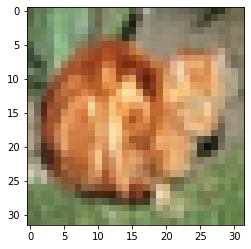

In [7]:
plt.imshow(single_image)

In [8]:
y_train[3]

array([4], dtype=uint8)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [13]:
y_train_onehot.shape

(50000, 10)

In [14]:
y_test_onehot = utils.to_categorical(y_test,10)

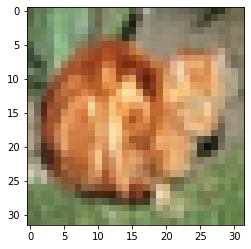

In [15]:
single_image = X_train[1100]
plt.imshow(single_image,cmap='gray')

In [16]:
model = keras.Sequential()
model.add(layers.Input(shape=(32,32,3)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [19]:
model.fit(X_train_scaled ,y_train_onehot, epochs=15,
          batch_size=100, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/15
500/500 [==============================] - 82s 161ms/step - loss: 1.4648 - accuracy: 0.4756 - val_loss: 1.2170 - val_accuracy: 0.5617
Epoch 2/15
500/500 [==============================] - 75s 151ms/step - loss: 1.1208 - accuracy: 0.6048 - val_loss: 1.0823 - val_accuracy: 0.6219
Epoch 3/15
500/500 [==============================] - 81s 162ms/step - loss: 0.9792 - accuracy: 0.6572 - val_loss: 0.9804 - val_accuracy: 0.6600
Epoch 4/15
500/500 [==============================] - 72s 145ms/step - loss: 0.8767 - accuracy: 0.6942 - val_loss: 0.9363 - val_accuracy: 0.6747
Epoch 5/15
500/500 [==============================] - 77s 154ms/step - loss: 0.7958 - accuracy: 0.7225 - val_loss: 0.8971 - val_accuracy: 0.6925
Epoch 6/15
500/500 [==============================] - 75s 150ms/step - loss: 0.7159 - accuracy: 0.7500 - val_loss: 0.8567 - val_accuracy: 0.7052
Epoch 7/15
500/500 [==============================] - 76s 153ms/step - loss: 0.6490 - accuracy: 0.7763 - val_loss: 0.8461 - val_ac

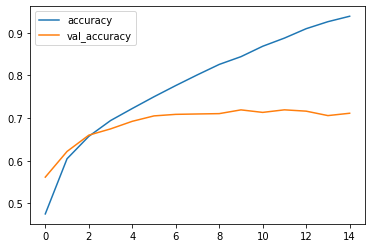

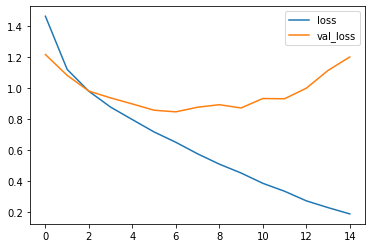

In [24]:
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [25]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [26]:
img = image.load_img('img.jpg')

In [32]:
img = image.load_img('img.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_32 = tf.image.resize(img_tensor,(32,32))
img_32_gray = tf.image.rgb_to_grayscale(img_32)
img_32_gray_scaled = img_32_gray.numpy()/255.0